In [2]:
import numpy as np
import pandas as pd
import tensorflow
from os import listdir
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import pickle
#import matplotlib.pyplot as plt
from math import sqrt
#import seaborn as sns
from sklearn.preprocessing import StandardScaler
#from statsmodels.stats.weightstats import _tconfint_generic

C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\ten

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Get data for training

## Prepare 1_0 data

In [5]:
file_list = listdir('Data_1_0')
file_list

['data_train_1.csv',
 'data_train_2.csv',
 'data_train_3.csv',
 'data_train_4.csv']

In [8]:
full_shape = 0
for i in file_list:
    df = pd.read_csv('Data_1_0\\'+str(i))
    full_shape = full_shape + df.shape[0]
full_shape

20500

In [18]:
df_1 = pd.read_csv('Data_1_0\\'+file_list[0])
df_1['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

In [19]:
df_2 = pd.read_csv('Data_1_0\\'+file_list[1])
df_2['0'] = df_2['0'] + 40
df_2['0'].unique()

array([ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109], dtype=int64)

In [20]:
df_3 = pd.read_csv('Data_1_0\\'+file_list[2])
df_3['0'] = df_3['0'] + 110
df_3['0'].unique()

array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169], dtype=int64)

In [21]:
df_4 = pd.read_csv('Data_1_0\\'+file_list[3])
df_4['0'] = df_4['0'] + 170
df_4['0'].unique()

array([170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204], dtype=int64)

In [22]:
df_1_0 = pd.concat([df_1, df_2, df_3, df_4])
df_1_0.shape

(20500, 16)

In [51]:
len(df_1_0['0'].unique())

205

In [54]:
print(df_1_0['15'].unique())
df_1_0 = df_1_0[df_1_0['15'] == '1_0']
print(df_1_0.shape)
df_1_0['15'].unique()

['1_0']
(20400, 16)


array(['1_0'], dtype=object)

In [65]:
df_1_0.to_csv('Data_1_0\\Prepared_data.csv', index = False)

## prepare 0_1 data

In [29]:
file_list = listdir('Data_0_1')
file_list

['data_train_1.csv',
 'data_train_2.csv',
 'data_train_3.csv',
 'data_train_4.csv',
 'data_train_5.csv',
 'data_train_6.csv',
 'data_train_7.csv',
 'data_train_8.csv']

In [30]:
full_shape = 0
for i in file_list:
    df = pd.read_csv('Data_0_1\\'+str(i))
    full_shape = full_shape + df.shape[0]
full_shape

20300

In [38]:
df_1 = pd.read_csv('Data_0_1\\'+file_list[0])
df_1['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [39]:
df_2 = pd.read_csv('Data_0_1\\'+file_list[1])
df_2['0'] = df_2['0'] + 34
df_2['0'].unique()

array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51], dtype=int64)

In [40]:
df_3 = pd.read_csv('Data_0_1\\'+file_list[2])
df_3['0'] = df_3['0'] + 52
df_3['0'].unique()

array([52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
      dtype=int64)

In [41]:
df_4 = pd.read_csv('Data_0_1\\'+file_list[3])
df_4['0'] = df_4['0'] + 86
df_4['0'].unique()

array([ 86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113], dtype=int64)

In [42]:
df_5 = pd.read_csv('Data_0_1\\'+file_list[4])
df_5['0'] = df_5['0'] + 114
df_5['0'].unique()

array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130], dtype=int64)

In [43]:
df_6 = pd.read_csv('Data_0_1\\'+file_list[5])
df_6['0'] = df_6['0'] + 131
df_6['0'].unique()

array([131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155],
      dtype=int64)

In [44]:
df_7 = pd.read_csv('Data_0_1\\'+file_list[6])
df_7['0'] = df_7['0'] + 156
df_7['0'].unique()

array([156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182], dtype=int64)

In [45]:
df_8 = pd.read_csv('Data_0_1\\'+file_list[7])
df_8['0'] = df_8['0'] + 183
df_8['0'].unique()

array([183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202], dtype=int64)

In [46]:
df_0_1 = pd.concat([df_1, df_2, df_3, df_4,
                   df_5, df_6, df_7, df_8])
df_0_1.shape

(20300, 16)

In [48]:
len(df_0_1['0'].unique())

203

In [56]:
print(df_0_1['15'].unique())
df_0_1 = df_0_1[df_0_1['15'] == '0_1']
print(df_0_1.shape)
df_0_1['15'].unique()

['0_1' '1_1' '0_0']
(20000, 16)


array(['0_1'], dtype=object)

In [66]:
df_0_1.to_csv('Data_0_1\\Prepared_data.csv', index = False)

## Full data

In [2]:
#data_10 = pd.read_csv('Data_1_0\\Prepared_data.csv', index_col = None)
#data_01 = pd.read_csv('Data_0_1\\Prepared_data.csv', index_col = None)
#data = pd.concat([data_10, data_01])
#print(data.shape)
#data.to_csv('full_data.csv', index = False)

(40400, 16)


In [4]:
with open('data_4_04.pickle', 'rb') as f:
    data = pickle.load(f)

In [5]:
print(data.shape)
data.head()

(40400, 16)


,sample_num,0,1,2,3,4,5,6,7,8,9,10,11,12,13,gesture
0,0,4179.359,3801.795,4181.667,4193.205,4206.154,4190.000,4197.179,4174.615,4172.179,4197.436,4180.769,4135.897,4168.590,4175.385,1_0
1,0,4192.436,3808.974,4187.949,4196.795,4215.897,4200.256,4206.154,4185.385,4188.718,4205.513,4205.769,4158.077,4194.487,4193.974,1_0
2,0,4189.872,3801.154,4184.744,4192.564,4192.564,4192.949,4203.077,4187.821,4174.744,4192.179,4215.769,4160.897,4198.462,4199.872,1_0
3,0,4186.026,3800.000,4185.641,4194.103,4211.538,4193.718,4203.974,4187.949,4176.282,4205.000,4205.641,4157.692,4193.205,4199.487,1_0
4,0,4197.051,3815.000,4192.179,4207.051,4245.769,4211.795,4216.667,4195.769,4212.949,4233.974,4211.923,4168.846,4199.615,4204.615,1_0


In [6]:
df = data.replace(['1_0','0_1'], [1,0])

# Creation of experiments

## Data explore

In [6]:
def plot_coorelation_matrix(df):
    fig = plt.figure(figsize = (20,12))
    df = pd.DataFrame(df)
    corr = df.corr()
    ax = sns.heatmap(corr, 
                     vmin=-1, 
                     vmax=1, 
                     center=0,
                     cmap=sns.diverging_palette(20, 220, n=200),
                     square=True)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right');

In [7]:
def plot_sensor(data,name,color):
    color_list=["navy","darkmagenta","red","black"]
    fig, ax = plt.subplots(2,7, figsize=(28,16))
    sns.set(style="white")
    sns.set(style="whitegrid")
    x=0
    for i in range(2):
        for j in range(7):
            plt.suptitle(name)
            sns.distplot(data.iloc[:,x],kde=False,ax=ax[i][j],color=color_list[color],bins=20);
            x+=1
    plt.show()

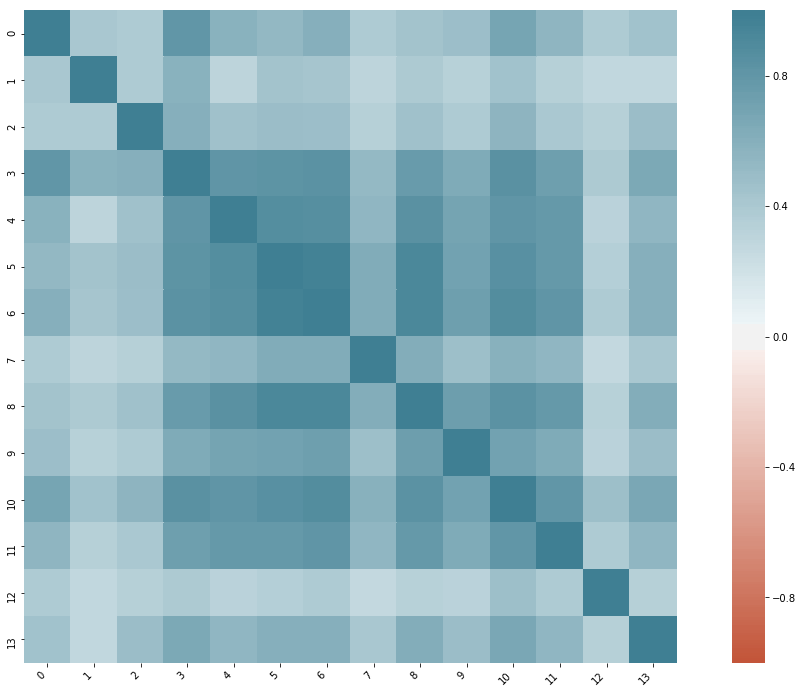

In [8]:
plot_coorelation_matrix(df.drop(columns = ['gesture','sample_num']))

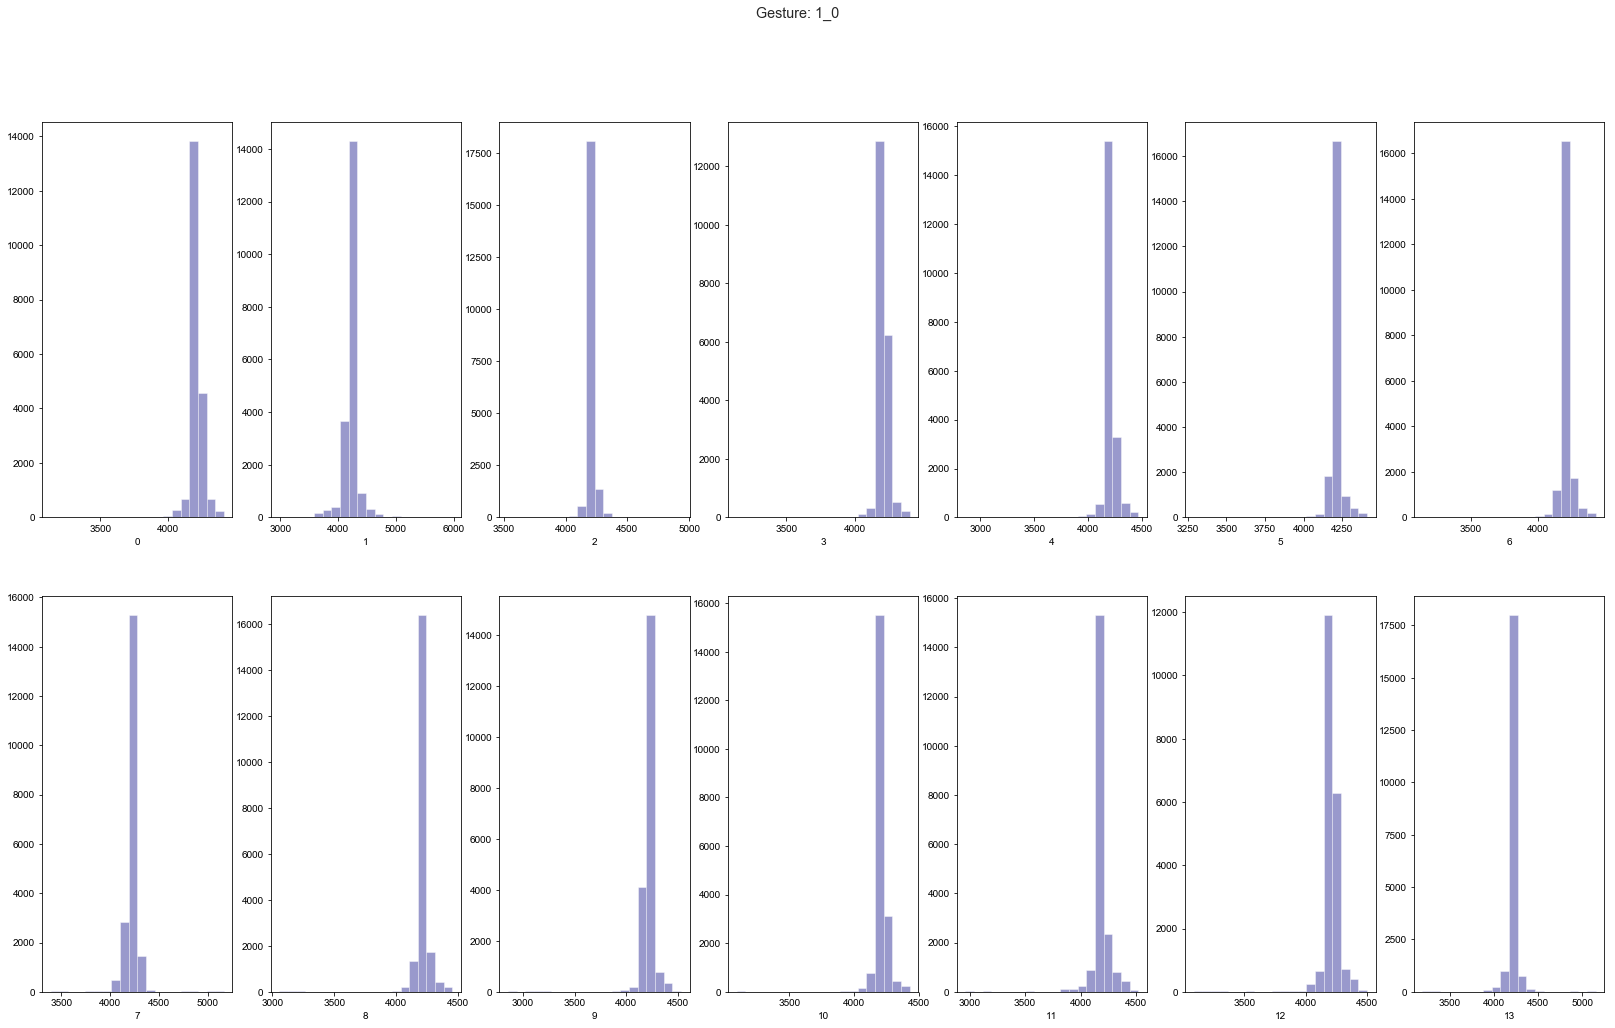

In [9]:
plot_sensor(df[df['gesture']==1].drop(columns=['sample_num', 'gesture']),'Gesture: 1_0',0)

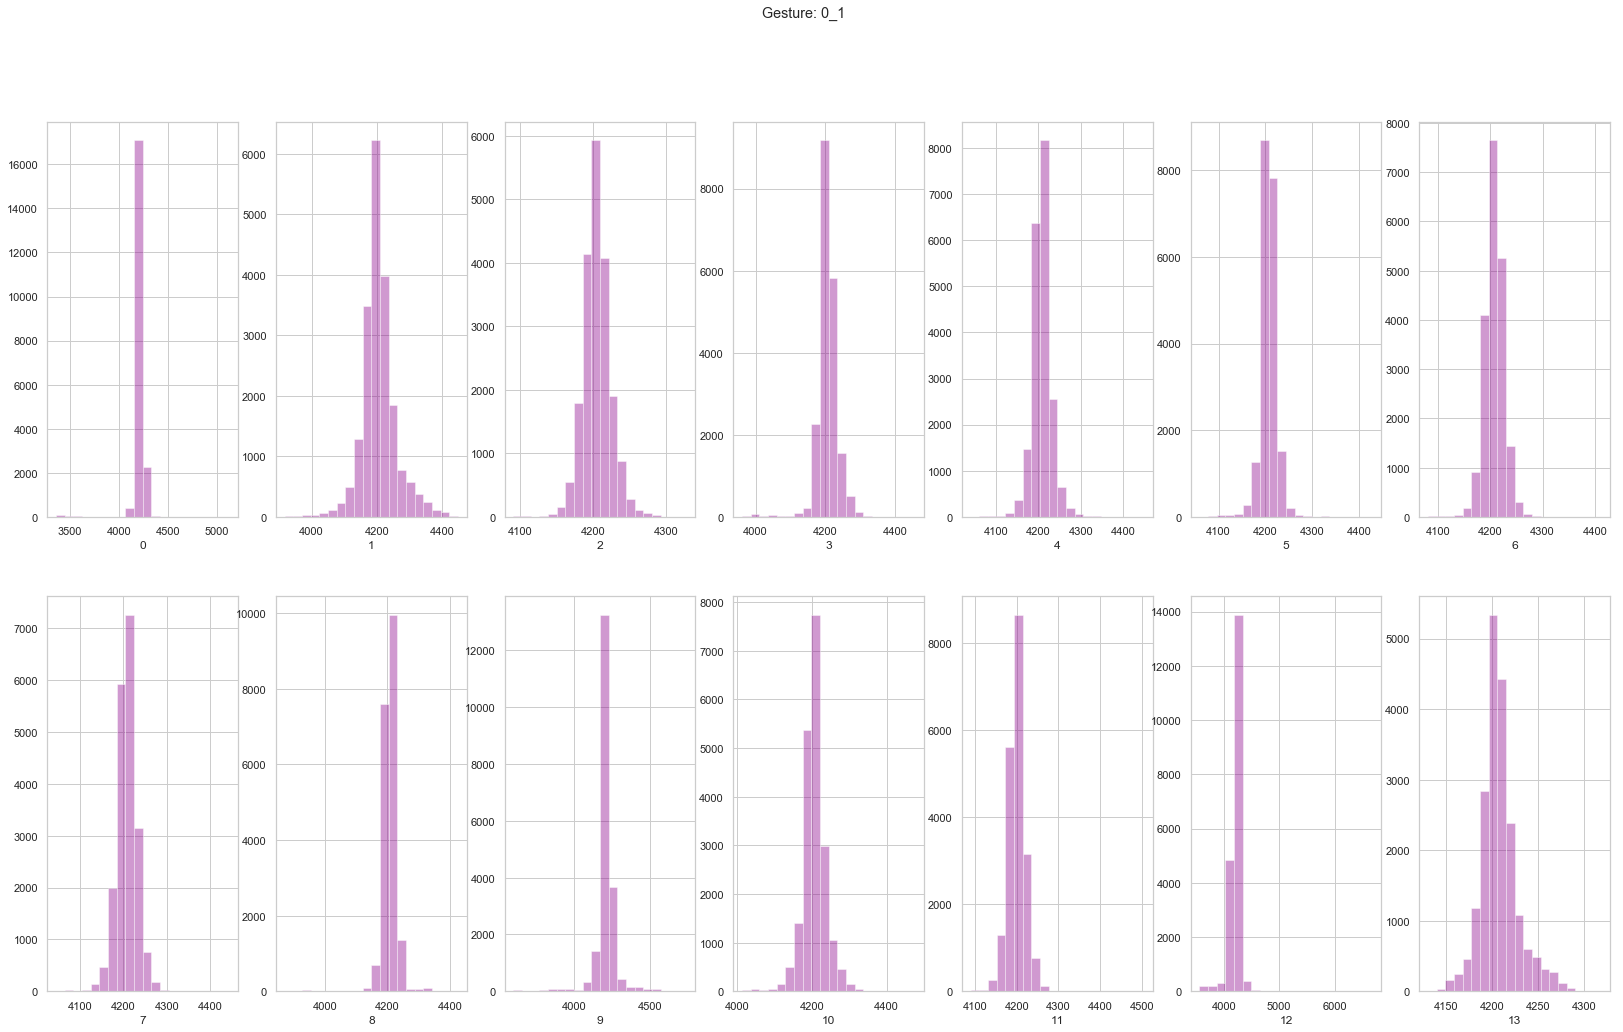

In [10]:
plot_sensor(df[df['gesture']==0].drop(columns=['sample_num', 'gesture']),'Gesture: 0_1',1)

## Adding features

In [17]:
df.head()

,sample_num,0,1,2,3,4,5,6,7,8,9,10,11,12,13,gesture
0,0,4179.359,3801.795,4181.667,4193.205,4206.154,4190.000,4197.179,4174.615,4172.179,4197.436,4180.769,4135.897,4168.590,4175.385,1
1,0,4192.436,3808.974,4187.949,4196.795,4215.897,4200.256,4206.154,4185.385,4188.718,4205.513,4205.769,4158.077,4194.487,4193.974,1
2,0,4189.872,3801.154,4184.744,4192.564,4192.564,4192.949,4203.077,4187.821,4174.744,4192.179,4215.769,4160.897,4198.462,4199.872,1
3,0,4186.026,3800.000,4185.641,4194.103,4211.538,4193.718,4203.974,4187.949,4176.282,4205.000,4205.641,4157.692,4193.205,4199.487,1
4,0,4197.051,3815.000,4192.179,4207.051,4245.769,4211.795,4216.667,4195.769,4212.949,4233.974,4211.923,4168.846,4199.615,4204.615,1


In [18]:
X = df.groupby(['sample_num']).agg(['min','max','sum','mean','std']).reset_index().drop(columns=['gesture', 'sample_num'])
X.head()

C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


0                                                      1            \
        min       max         sum        mean        std       min       max   
0  4156.667  4221.795  418897.697  4188.97697  12.363993  3783.974  3887.051   
1  4143.333  4197.436  416940.383  4169.40383  12.518544  3636.410  4023.846   
2  4096.026  4224.744  415229.354  4152.29354  34.333470  3864.103  4555.641   
3  4197.308  4259.744  422341.534  4223.41534  11.273607  4260.385  4323.974   
4  4198.590  4268.974  421912.309  4219.12309  14.227398  4273.205  4375.513   

                                       ...        12                        \
          sum        mean         std  ...       min       max         sum   
0  383189.232  3831.89232   24.245113  ...  4050.256  4214.231  416142.053   
1  372300.894  3723.00894   94.318268  ...  4037.179  4280.641  411030.901   
2  411342.183  4113.42183  230.499213  ...  4009.487  4315.897  414305.125   
3  429582.951  4295.82951   13.439999  ...  4191.026  4252.308  422310.133   
4  430230.386  4302.30386   21.269972  ...  4200.897  4268.205  422940.768   

                                13                                    \
         mean        std       min       max         sum        mean   
0  4161.42053  37.969154  4167.051  4217.821  419399.744  4193.99744   
1  4110.30901  61.174306  4152.436  4223.077  418745.002  4187.45002   
2  4143.05125  84.679903  4095.385  4230.128  415831.539  4158.31539   
3  4223.10133  11.842194  4193.205  4256.923  421767.951  4217.67951   
4  4229.40768  11.884058  4192.564  4260.128  421607.436  4216.07436   

              
         std  
0  12.776230  
1  16.677417  
2  40.632743  
3  11.292804  
4  12.286136  

[5 rows x 70 columns]

In [19]:
y = df.groupby(['sample_num']).agg(['min','max','sum','mean','std']).reset_index()['gesture']['min']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: min, dtype: int64

## Data preparation

In [20]:
X,y = shuffle(X, y, random_state=0)

In [21]:
train_size = int(len(X) * 0.9)
test_size = len(X) - train_size
train, test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
print(train_size, test_size)

363 41


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
print(X_train.shape, X_test.shape)

(363, 70) (41, 70)


In [23]:
pickle.dump(scaler, open('pred_dir\\scaler.pkl', 'wb'))

In [24]:
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]
print(y_train.shape, y_test.shape)

(363,) (41,)


## Modelling

### Logistic regression

In [3]:
clf = LogisticRegression()
lr_accur_list = cross_val_score(clf, X_train, y_train, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', lr_accur_list.mean())

In [21]:
lr_mean_std = lr_accur_list.std(ddof=1)/sqrt(len(lr_accur_list))
print('logistic regression model mean accuracy 95%% confidence interval', _tconfint_generic(lr_accur_list.mean(), 
                                                                       lr_mean_std,
                                                                       len(lr_accur_list) - 1,
                                                                       0.05, 'two-sided'))

logistic regression model mean accuracy 95%% confidence interval (0.8941903370698824, 0.9458337427374791)


In [22]:
clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, clf.predict(X_test)))

Accuracy score for test:  0.8780487804878049


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Decision Tree

In [23]:
tree_clf = DecisionTreeClassifier()
tree_accur_list = cross_val_score(tree_clf, X_train, y_train, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', tree_accur_list.mean())

Mean Accuracy after 20 experiments 0.8703044375644995


In [24]:
tree_mean_std = tree_accur_list.std(ddof=1)/sqrt(len(tree_accur_list))
print('decision tree model mean accuracy 95%% confidence interval', _tconfint_generic(tree_accur_list.mean(), 
                                                                       tree_mean_std,
                                                                       len(tree_accur_list) - 1,
                                                                       0.05, 'two-sided'))

decision tree model mean accuracy 95%% confidence interval (0.8335487215294574, 0.9070601535995416)


In [25]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, tree_clf.predict(X_test)))

Accuracy score for test:  0.8048780487804879


### Random Forest classifier

In [26]:
forest_clf = RandomForestClassifier()
forest_accur_list = cross_val_score(forest_clf, X, y, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', forest_accur_list.mean())

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

Mean Accuracy after 20 experiments 0.9085714285714286


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
forest_mean_std = forest_accur_list.std(ddof=1)/sqrt(len(forest_accur_list))
print('random forest model mean accuarcy 95%% confidence interval', _tconfint_generic(forest_accur_list.mean(), 
                                                                       forest_mean_std,
                                                                       len(forest_accur_list) - 1,
                                                                       0.05, 'two-sided'))

random forest model mean accuarcy 95%% confidence interval (0.8802645139521971, 0.9368783431906601)


In [28]:
forest_clf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, forest_clf.predict(X_test)))

Accuracy score for test:  0.926829268292683


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Gradient Boosting classifier (best)

In [25]:
boosting_clf = GradientBoostingClassifier()
boosting_accur_list = cross_val_score(boosting_clf, X, y, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', boosting_accur_list.mean())

Mean Accuracy after 20 experiments 0.9602380952380951


In [30]:
boosting_mean_std = boosting_accur_list.std(ddof=1)/sqrt(len(boosting_accur_list))
print('random forest model mean accuracy 95%% confidence interval', _tconfint_generic(boosting_accur_list.mean(), 
                                                                       boosting_mean_std,
                                                                       len(boosting_accur_list) - 1,
                                                                       0.05, 'two-sided'))

random forest model mean accuracy 95%% confidence interval (0.9439847773424285, 0.9764914131337618)


In [26]:
boosting_clf = GradientBoostingClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, boosting_clf.predict(X_test)))

Accuracy score for test:  0.975609756097561


In [27]:
pickle.dump(boosting_clf, open('pred_dir\\model.pkl', 'wb'))

## Tuning GradientBoostingClassifier

In [101]:
clf = GradientBoostingClassifier()

In [102]:
params = {
    'n_estimators': range(20,200,10),
    'criterion': ['friedman_mse', 'mse', 'mae']
}

In [103]:
g_search = GridSearchCV(clf,
                       params,
                       scoring='accuracy',
                       cv=5)
g_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(20, 200, 10), 'criterion': ['friedman_mse', 'mse', 'mae']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [106]:
print('Best params: '+ str(g_search.best_params_) + '\nBest score: ' + str(g_search.best_score_))

Best params: {'criterion': 'friedman_mse', 'n_estimators': 120}
Best score: 0.9586776859504132


In [107]:
print('Accuracy score by best estimator for test: ',
      accuracy_score(y_test, g_search.best_estimator_.predict(X_test)))

Accuracy score by best estimator for test:  0.9512195121951219


## Prediction function (prepare data)

In [45]:
def predict_data(model, scaler, data):
    data_curr = data.copy()
    data_curr['sample_num'] = 1
    data_curr = data_curr.groupby(['sample_num']).agg(['min','max','sum','mean','std'])
    data_curr = scaler.transform(data_curr)
    pred = model.predict(data_curr)
    if pred == 1:
        return '1_0'
    elif pred == 0:
        return '0_1'

In [47]:
test_data = data[data['sample_num'] == 400].drop(columns=['sample_num', 'gesture'])
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
39600,4194.615,4184.744,4197.564,4198.333,4209.103,4213.077,4227.949,4221.667,4216.667,4188.333,4193.333,4186.026,4182.179,4196.795
39601,4195.256,4188.590,4201.282,4201.923,4212.949,4214.744,4230.897,4219.872,4212.436,4191.410,4198.077,4189.231,4178.846,4197.821
39602,4198.718,4193.333,4204.872,4202.436,4221.410,4214.615,4235.385,4223.205,4211.282,4189.872,4199.615,4190.897,4183.205,4197.821
39603,4198.718,4189.872,4205.000,4201.538,4217.308,4211.667,4236.923,4223.974,4214.103,4187.949,4197.821,4189.231,4188.846,4198.077
39604,4198.205,4193.077,4206.923,4204.872,4218.077,4207.564,4234.872,4220.256,4215.769,4190.128,4201.154,4193.333,4190.128,4200.256


In [48]:
predict_data(boosting_clf, scaler, test_data)

'0_1'